Analysis of IMDB Dataset by First Setup Notebook importing needed libriries

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load it into a pandas dataframe using the read_csv()

In [248]:
#reading csv file
df=pd.read_csv("./imdb_top_1000.csv")

#viewing first records
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


Clean and preprocess the data by removing unnecessary columns and handling missing values.

checking df details and types

In [249]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [251]:
# we will convert Gross to float since it maybe used as feature for top revenue movies

df['Gross']=df['Gross'].str.replace(',','')
df['Gross'].fillna(0, inplace = True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
print(df['Gross'])

0       28341469
1      134966411
2      534858444
3       57300000
4        4360000
         ...    
995            0
996            0
997     30500000
998            0
999            0
Name: Gross, Length: 1000, dtype: int64


In [252]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,843.000000,1.000000e+03,1.000000e+03
mean,7.949300,77.971530,2.736929e+05,5.653688e+07
std,0.275491,12.376099,3.273727e+05,1.032382e+08
min,7.600000,28.000000,2.508800e+04,0.000000e+00
25%,7.700000,70.000000,5.552625e+04,4.457098e+05
50%,7.900000,79.000000,1.385485e+05,1.070275e+07
75%,8.100000,87.000000,3.741612e+05,6.153989e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


In [254]:
print(f'count of missing in each col: \n{df.isnull().sum().sort_values(ascending=False)}')


count of missing in each col: 
Meta_score       157
Certificate      101
Gross              0
No_of_Votes        0
Star4              0
Star3              0
Star2              0
Star1              0
Director           0
Overview           0
IMDB_Rating        0
Genre              0
Runtime            0
Released_Year      0
Series_Title       0
Poster_Link        0
dtype: int64


In [275]:
#we need to put all types of cert and ask domain expert about it for required details and question no need for it now
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [276]:
#replace all missing values to NaN
df.fillna(np.NaN,inplace=True)

#Meta_score fill value with 0  for not filled and better ask domain expert
df['Meta_score'].sort_values( ascending=False)

df['Meta_score'].fillna(0, inplace = True)
df['Meta_score'].sort_values( ascending=False)




df.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,7.949300,65.730000,2.736929e+05,5.653688e+07
std,0.275491,30.570208,3.273727e+05,1.032382e+08
min,7.600000,0.000000,2.508800e+04,0.000000e+00
25%,7.700000,63.000000,5.552625e+04,4.457098e+05
50%,7.900000,76.000000,1.385485e+05,1.070275e+07
75%,8.100000,85.250000,3.741612e+05,6.153989e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


Identify the most popular genre of movies and TV shows using 

In [277]:
# we need to get related columns 
df_genre=df[['Series_Title','Genre','IMDB_Rating','Meta_score','No_of_Votes','Gross']]
df_genre

,Series_Title,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,Drama,9.3,80.0,2343110,28341469
1,The Godfather,"Crime, Drama",9.2,100.0,1620367,134966411
2,The Dark Knight,"Action, Crime, Drama",9.0,84.0,2303232,534858444
3,The Godfather: Part II,"Crime, Drama",9.0,90.0,1129952,57300000
4,12 Angry Men,"Crime, Drama",9.0,96.0,689845,4360000
...,...,...,...,...,...,...
995,Breakfast at Tiffany's,"Comedy, Drama, Romance",7.6,76.0,166544,0
996,Giant,"Drama, Western",7.6,84.0,34075,0
997,From Here to Eternity,"Drama, Romance, War",7.6,85.0,43374,30500000
998,Lifeboat,"Drama, War",7.6,78.0,26471,0


In [278]:
df_genre['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [279]:
# Convert to List
df_unique_genre_list=df_genre['Genre'].unique().tolist()

# Convert to List
df_unique_genre_list_splitted=list()

df_unique_genre_set= set()


#splitting types and stripping words
for item in df_unique_genre_list:
    splitted_item=item.split(',')
    for item_split in splitted_item:
        df_unique_genre_list_splitted.append(item_split.strip())

#now we put list to set for unique genre values and sort them 
df_unique_genre_set.update(df_unique_genre_list_splitted)
print(sorted(df_unique_genre_set))
print(f'we have {len(df_unique_genre_set)} unique movies genre type')

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']
we have 21 unique movies genre type


a new dataframe containing the count of movies/TV shows in each genre using pandas.

In [280]:
df_genre_count = pd.DataFrame(list(df_unique_genre_set))
df_genre_count.columns = ['Genre']
df_genre_count['g_count'] = df_genre_count['Genre']


for item in df_genre_count['Genre']:
    df_genre_count.loc[df_genre_count['Genre'] == item, 'g_count'] = df_genre["Genre"].str.contains(item).value_counts()[True]

#Genre with each count
df_genre_count

,Genre,g_count
0,Film-Noir,19
1,Biography,109
2,Music,47
3,Sci-Fi,67
4,Drama,724
5,Adventure,196
6,Fantasy,66
7,Action,189
8,Musical,17
9,War,51


In [281]:
df_genre_count=df_genre_count.sort_values(by=['g_count'], ascending=False)
df_genre_count

,Genre,g_count
4,Drama,724
11,Comedy,233
12,Crime,209
5,Adventure,196
7,Action,189
20,Thriller,137
13,Romance,125
1,Biography,109
18,Mystery,99
16,Animation,82


The most popular genre of movies and TV showsis "Drama" , Below is the Bar Chart for all genre

<AxesSubplot:xlabel='Genre'>

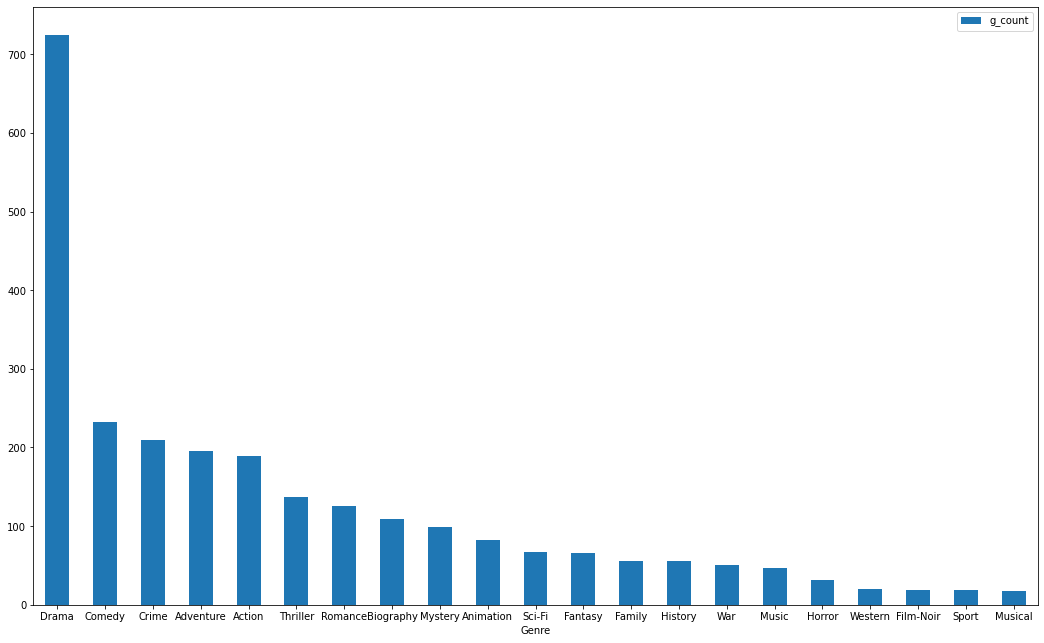

In [285]:
df_genre_count.plot.bar(x='Genre', y='g_count', rot=0, figsize=(18, 11))

Identify the director with the most top-rated movies/TV shows by creating a new dataframe containing the count of movies/TV shows directed by each director using pandas.


In [302]:
#number of directors
len(df['Director'].unique())

548

In [308]:
#Top Dataframe containing the count of movies/TV shows directed by each director using pandas.
df_agg =df.groupby('Director').size()
df_agg =df_agg.sort_values(ascending=False)
df_agg

Director
Alfred Hitchcock       14
Steven Spielberg       13
Hayao Miyazaki         11
Martin Scorsese        10
Akira Kurosawa         10
                       ..
Michael Radford         1
Michel Gondry           1
Michel Hazanavicius     1
Mikael Håfström         1
Aamir Khan              1
Length: 548, dtype: int64

Visualize the data using a bar chart to show count of movies/TV shows directed by each directo using pandas and matplotlib

<AxesSubplot:xlabel='Director'>

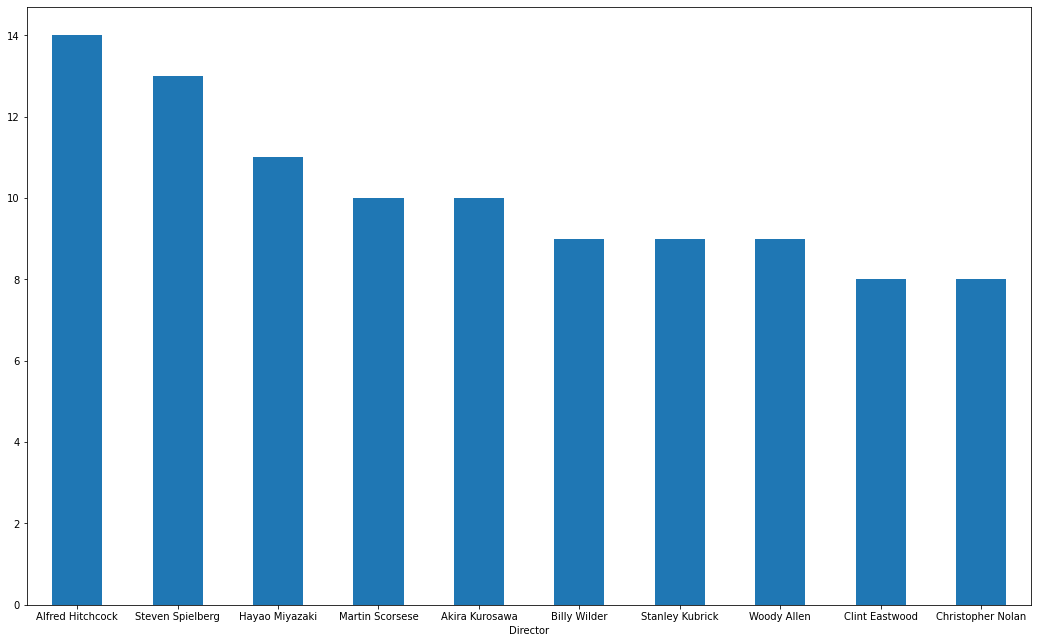

In [314]:
df_agg.head(10).plot.bar(x='Director', y='Count', rot=0, figsize=(18, 11))

A report summarizing analysis and findings, including any insights or observations  discovered :

First of all for the needed questions data gave us indication of the most genre used "DRAMA" , and top director who directed movies is "Alfred Hitchcock"

Movies genre there were two Music , Musical genre is there any difference between them or do they have the same type so need to be merged 

there is more than direction or feature to compare most genre or movie or director based on votes , rating , score, gross 

certifcate need more invistigation with related parties for its possiblities and what to do with empty values
